In [ ]:
# !python3 -m pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1
!python3 -m pip install autokeras

!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc2

  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc2) to /tmp/pip-req-build-nny6k7qs
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-nny6k7qs
  Running command git checkout -q 8f0d4550417af1676143499c688434065eb807c9
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc2-cp36-none-any.whl size=91717 sha256=4b94af102403699c9b868ec33e5f71fb342fceda98f207749f7acad793474b25
  Stored in directory: /tmp/pip-ephem-wheel-cache-bk_mbot_/wheels/3b/a3/4d/85f2944f8fc55e8bb9fc23a1470ef9dfcb170de55958ba2d53
Successfully built keras-tuner


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.keras.utils.data_utils import Sequence
import autokeras as ak
import matplotlib.pyplot as plt





In [ ]:
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()
print(train_images.shape)  # (60000, 28, 28)
print(train_labels.shape)  # (60000,)
print(train_labels[:3])  # array([7, 2, 1], dtype=uint8)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
[9 0 0]


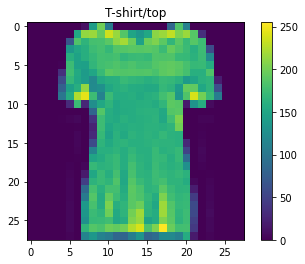

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_labels[10]])
plt.show()

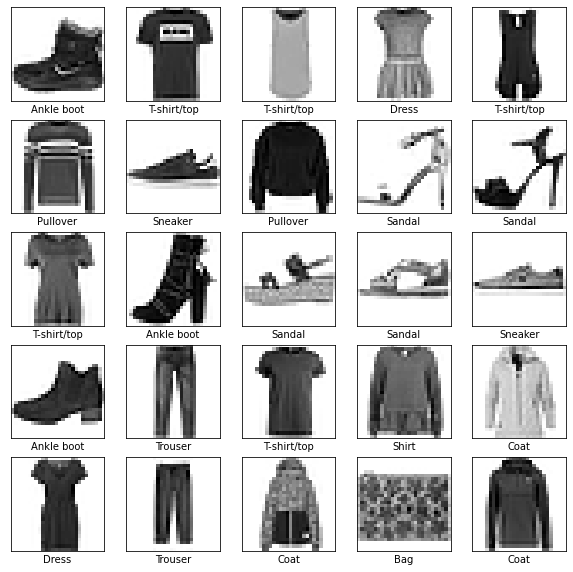

In [ ]:
train_images[1].shape

plt.figure(figsize=(10,10))
for i in range(0,25):
   plt.subplot(5,5,i+1)
   plt.xticks([])
   plt.yticks([])
   plt.grid(False)
   plt.imshow(train_images[i], cmap=plt.cm.binary)
   plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images1 = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images1 = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
input_node = ak.ImageInput()
output_node = ak.ImageBlock(
    # Only search ResNet architectures.
    block_type="resnet",
    # Normalize the dataset.
    normalize=True,
    # Do not do data augmentation.
    augment=False,
)(input_node)
output_node = ak.ClassificationHead()(output_node)

clf = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=6)
clf.fit(train_images1, train_labels, epochs=10)

predicted_y = clf.predict(test_images)
print(predicted_y)


# Evaluate the best model with testing data.
print(clf.evaluate(test_images1, test_labels))

Trial 6 Complete [00h 08m 31s]
val_loss: 0.25735387206077576

Best val_loss So Far: 0.25735387206077576
Total elapsed time: 00h 47m 29s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1875/1875 [==============================] - 57s 31ms/step - loss: 1.0792 - accuracy: 0.6581
Epoch 2/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.6654 - accuracy: 0.7995
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3914 - accuracy: 0.8610
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.5425 - accuracy: 0.8241
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.4089 - accuracy: 0.8584
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3985 - accuracy: 0.8607
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2956 - accuracy: 0.8922
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2450 - accuracy: 0

In [ ]:
model = clf.export_model()


In [ ]:
print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

try:
    model.save("model_autokeras", save_format="tf")
except:
    model.save("model_autokeras.h5")

<class 'tensorflow.python.keras.engine.functional.Functional'>
INFO:tensorflow:Assets written to: model_autokeras/assets


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("model_autokeras", custom_objects=ak.CUSTOM_OBJECTS)

In [ ]:
loaded_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 28, 28, 1)    3           input_1[0][0]                    
__________________________________________________________________________________________________
resizing (Resizing)             (None, 32, 32, 1)    0           normalization[0][0]              
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 32, 32, 3)    0           resizing[0][0]                   
                                                                 resizing[0][0]        

In [ ]:
predicted_y = loaded_model.predict(tf.expand_dims(test_images, -1))
print(predicted_y)

[[9.7407282e-09 9.6735748e-09 1.7695395e-08 ... 5.8083289e-05
  3.8019671e-08 9.9991894e-01]
 [1.6925980e-03 1.0041306e-05 9.9494213e-01 ... 2.3806992e-06
  1.6620761e-05 4.1037289e-05]
 [3.6199364e-16 1.0000000e+00 4.0721215e-36 ... 3.2791762e-21
  8.5897304e-20 2.2868263e-35]
 ...
 [5.1868676e-07 3.4984387e-11 2.6656419e-08 ... 1.7583994e-09
  9.9999928e-01 5.5788738e-09]
 [1.5828062e-05 9.9993229e-01 5.5408054e-06 ... 6.2388978e-08
  1.1602634e-06 2.4139087e-08]
 [8.0586289e-04 1.3068675e-04 6.2290614e-04 ... 9.5778394e-01
  4.9933796e-03 5.0688680e-04]]


In [ ]:
print(np.argmax(predicted_y[1]))


2


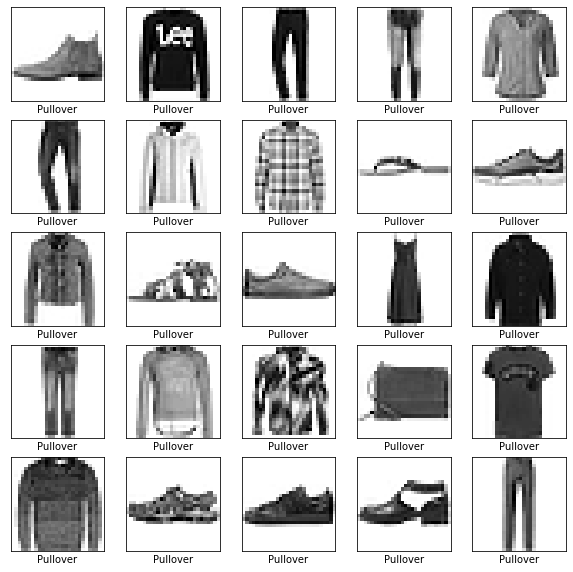

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,25):
   plt.subplot(5,5,i+1)
   plt.xticks([])
   plt.yticks([])
   plt.grid(False)
   plt.imshow(test_images[i], cmap=plt.cm.binary)
   plt.xlabel(class_names[np.argmax(predicted_y[1])])
plt.show()

In [ ]:
!zip -r /content/file.zip /content/model_autokeras

  adding: content/model_autokeras/ (stored 0%)
  adding: content/model_autokeras/saved_model.pb (deflated 93%)
  adding: content/model_autokeras/variables/ (stored 0%)
  adding: content/model_autokeras/variables/variables.index (deflated 78%)
  adding: content/model_autokeras/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/model_autokeras/assets/ (stored 0%)


In [ ]:

from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

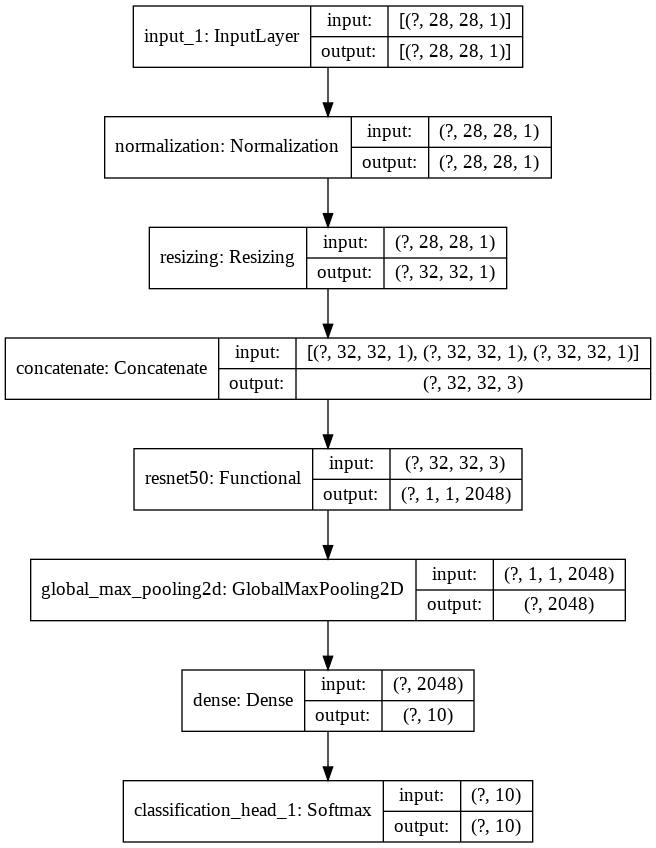

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

